In [ ]:

from utils import fit_scaling_laws, plot_actual_vs_predicted

from experiments.evals.task_configs import CORE_TASKS, convert_to_task_metrics

ENTITY = "stanford-mercury"
PROJECT = "marin"

# define the list of smaller runs to use as "ladder" models
# RUNS = [
#     "tootsie-scaling-512-81c36c",
#     "tootsie-scaling-768-d17a90",
#     "tootsie-scaling-1024-f4e4be",
#     "tootsie-scaling-1536-e2a6d8",
#     "tootsie-scaling-2048-72c648",
# ]

RUNS = [
    "scaling-law-suite-default-v2-512-4d173f",
    "scaling-law-suite-default-v2-768-12373d",
    "scaling-law-suite-default-v2-1024-77c98b",
    "scaling-law-suite-default-v2-1536-18344d",
    "scaling-law-suite-default-v2-2048-7845a1",

]

DEFAULT_RUNS = [
    "scaling-law-suite-default-512-9b1182",
    "scaling-law-suite-default-768-0631eb",
    "scaling-law-suite-default-1024-e6a4e5",
    "scaling-law-suite-default-1536-51914a",
    "scaling-law-suite-default-2048-14ef39",
]

TOKEN_FILTERS = {
    "scaling-law-suite-default-v2-512-4d173f": 5.0e10,  # 50B tokens
    "scaling-law-suite-default-v2-768-12373d": 7.0e10,  # 70B tokens
    "scaling-law-suite-default-v2-1024-77c98b": 1.0e11, # 100B tokens
    "scaling-law-suite-default-v2-1536-18344d": 2.1e11, # 210B tokens
    "scaling-law-suite-default-v2-2048-7845a1": 2.1e11, # 210B tokens
}

# the large run to predict the performance of
PRED_RUN = "llama-8b-tootsie-0.001-19ad63"

# define the eval task loss metric
TASK_LOSS = "eval/paloma/c4_en/bpb"
# TASK_LOSS = "internal_eval/mmlu/bpb"

# do we want to take the last step of the run or average over all steps, or just use all steps?
AGGREGATION = "filtered" #"all"

TOKENS_COL = "throughput/total_tokens"
PARAM_COL = "parameter_count"
PARAM_COL_TO_USE = "computed_params"

# accuracy we ultimately want to predict
TASK_ACCURACY = "lm_eval/hellaswag_10shot/acc"

ACCS = convert_to_task_metrics(CORE_TASKS, metric="acc")


/Users/nikilravi/miniconda3/envs/crfm_new/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-10 02:19:26,307	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [ ]:
results = fit_scaling_laws(
    runs=RUNS,
    loss_metrics=[TASK_LOSS],
    accuracy_metrics=ACCS,
    entity=ENTITY,
    project=PROJECT,
    pred_run=PRED_RUN,
    use_log_for_ND=True,
    normalize_ND=True,
    count_embedding_params=False,
    token_filters=TOKEN_FILTERS,
    #use_neural_scaling=True,
    #use_neural_accuracy=True
)


     eval/paloma/c4_en/bpb  throughput/total_tokens  \
0                 3.764435             4.194304e+06   
1                 1.514564             2.101346e+09   
2                 1.261079             4.198498e+09   
3                 1.186452             6.295650e+09   
4                 1.152727             8.392802e+09   
5                 1.136864             1.048995e+10   
6                 1.122585             1.258711e+10   
7                 1.112506             1.468426e+10   
8                 1.108450             1.678141e+10   
9                 1.101475             1.887856e+10   
10                1.095712             2.097571e+10   
11                1.093881             2.307287e+10   
12                1.089990             2.517002e+10   
13                1.091447             2.726717e+10   
14                1.084561             2.936432e+10   
15                1.086406             3.146147e+10   
16                1.082006             3.355863e+10   
17        

In [5]:
results

({},
 ({'eval/paloma/c4_en/bpb': (array([0.88075703, 0.84879279, 0.83596116, 0.8281104 , 0.82302022,
           0.81882006, 0.81641668, 0.81367987, 0.81223959, 0.8107903 ,
           0.80884665, 0.80795377, 0.80673552, 0.80621433, 0.80519038,
           0.80455309, 0.80363607, 0.80237347, 0.80176669, 0.80091393,
           0.80123138, 0.80021042, 0.79994798, 0.79999822, 0.79894078,
           0.79975969, 0.7989825 , 0.7979725 , 0.79744339, 0.79764444,
           0.79725903, 0.7963618 , 0.79696178, 0.79613042, 0.79593462,
           0.79567122, 0.79516333, 0.79545355, 0.79514819, 0.79176152,
           0.79132468, 0.79041171, 0.78982705, 0.78952217, 0.7895807 ,
           0.78898627, 0.78872025, 0.78849959, 0.78850639, 0.78796756,
           0.78779185, 0.78690326, 0.78722352, 0.78678226, 0.7862345 ,
           0.78649789, 0.78638011, 0.7860859 , 0.78561205, 0.78554761,
           0.78619677, 0.78568959, 0.78554815, 0.78551286, 0.78490293,
           0.78483886, 0.78501928, 0.78438234, 

Relative Errors:
--------------------------------------------------
eval/paloma/c4_en/bpb: 1.24%
lm_eval/agieval_lsat_ar/acc_from_eval/paloma/c4_en/bpb: 17.06%
lm_eval/arc_easy/acc_from_eval/paloma/c4_en/bpb: 1.06%
lm_eval/arc_challenge/acc_from_eval/paloma/c4_en/bpb: 12.57%
lm_eval/boolq/acc_from_eval/paloma/c4_en/bpb: 15.88%
lm_eval/commonsense_qa/acc_from_eval/paloma/c4_en/bpb: 71.68%
lm_eval/copa/acc_from_eval/paloma/c4_en/bpb: 4.55%
lm_eval/hellaswag_0shot/acc_from_eval/paloma/c4_en/bpb: 3.37%
lm_eval/hellaswag_10shot/acc_from_eval/paloma/c4_en/bpb: 3.41%
lm_eval/lambada_openai/acc_from_eval/paloma/c4_en/bpb: 1.61%
lm_eval/openbookqa/acc_from_eval/paloma/c4_en/bpb: 9.14%
lm_eval/piqa/acc_from_eval/paloma/c4_en/bpb: 0.51%
lm_eval/wsc273/acc_from_eval/paloma/c4_en/bpb: 30.80%
lm_eval/winogrande/acc_from_eval/paloma/c4_en/bpb: 11.61%
eval/paloma/c4_en/bpb
[0.88075703 0.84879279 0.83596116 0.8281104  0.82302022 0.81882006
 0.81641668 0.81367987 0.81223959 0.8107903  0.80884665 0.80795

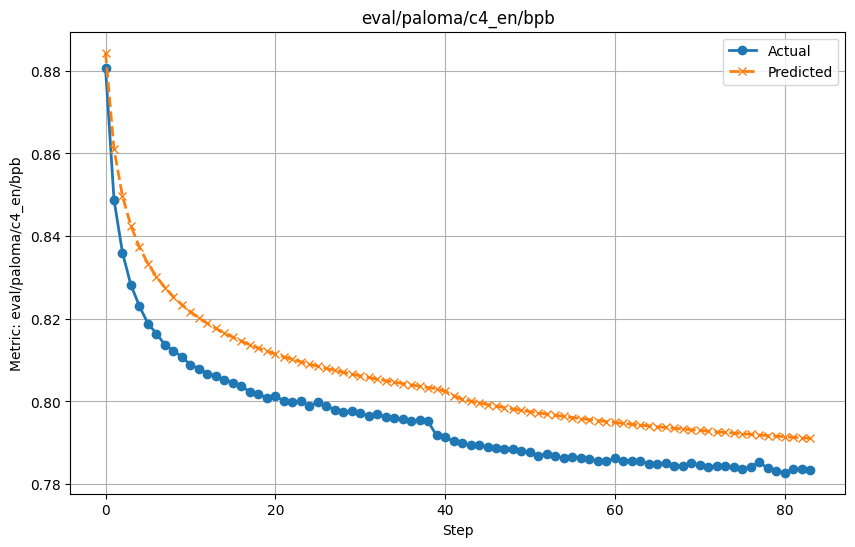

In [6]:
_, predictions = results
loss_results, accuracy_results, _, _, relative_errors = predictions

print("Relative Errors:")
print("-" * 50)
for metric, error in relative_errors.items():
    print(f"{metric}: {error:.2f}%")

for loss_metric, (actual, predicted) in loss_results.items():
    print(loss_metric)
    print(actual)
    print(predicted)

    # plot actual vs predicted
    plot_actual_vs_predicted(actual, predicted, loss_metric)
    break




lm_eval/agieval_lsat_ar/acc_from_eval/paloma/c4_en/bpb
[0.22173913 0.15652174 0.20434783 0.19130435 0.22173913 0.17826087
 0.21304348 0.20434783 0.1826087  0.19565217 0.2173913  0.20434783
 0.21304348 0.19130435 0.26086957 0.20434783 0.19130435 0.17826087
 0.17391304 0.24347826 0.23043478 0.24347826 0.20869565 0.2
 0.21304348 0.23043478 0.19130435 0.18695652 0.19565217 0.15652174
 0.22173913 0.1826087  0.23043478 0.23043478 0.23043478 0.23043478
 0.2        0.15652174 0.19130435 0.17826087 0.17826087 0.18695652
 0.17826087 0.16086957 0.16086957]
[0.22800766 0.22800774 0.2280079  0.22800804 0.2280081  0.22800816
 0.22800821 0.22800827 0.22800832 0.22800836 0.22800841 0.22800845
 0.22800849 0.22800853 0.22800857 0.22800861 0.22800864 0.22800868
 0.22800871 0.22800874 0.22800877 0.2280088  0.22800883 0.22800886
 0.22800888 0.22800891 0.22800893 0.22800896 0.22800898 0.228009
 0.22800903 0.22800905 0.22800907 0.22800909 0.22800911 0.22800913
 0.22800915 0.22800917 0.22800918 0.2280092  0.2

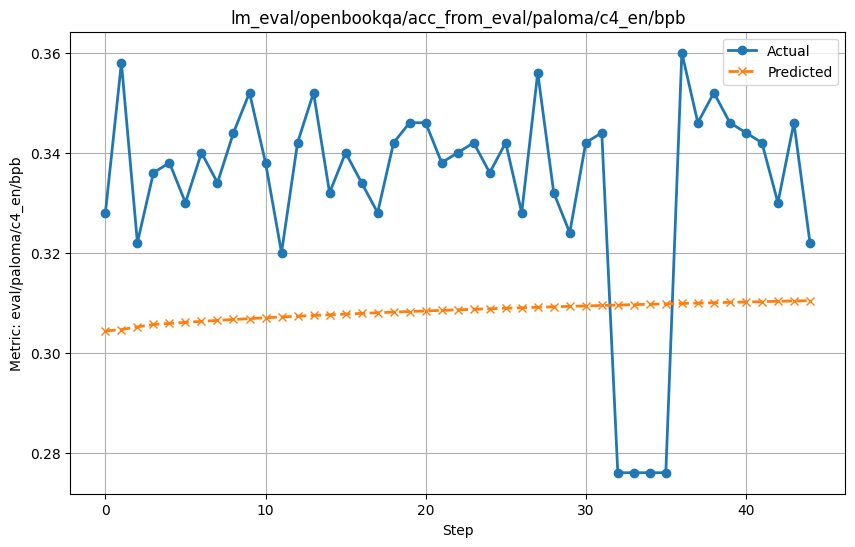

In [14]:
for index, (acc_metric, (actual, predicted)) in enumerate(accuracy_results.items()):
    print(acc_metric)
    print(actual)
    print(predicted)

    # plot actual vs predicted
    if index == 9:
        plot_actual_vs_predicted(actual, predicted, acc_metric)
        break

